In [203]:
import numpy as np
import cv2 

from matplotlib import pyplot as plt
%matplotlib inline

In [204]:
def find_rectangle(contour):
    '''
    寻找矩形轮廓
    return：
        列表，包含四个值，x和y的最值坐标
    '''
    y,x=[],[]
    
    for p in contour:
        y.append(p[0][0])
        x.append(p[0][1])
    
    return [min(y),min(x),max(y),max(x)]

def locate_license(img):
    '''
    定位图中最大的矩形
    return：
        列表，轮廓值
    '''
    contours,hier=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    #找出最大的区域
    block=[]
    for c in contours:
        #找出轮廓的左上点和右下点，由此计算它的面积和长度比
        r=find_rectangle(c)
        a=(r[2]-r[0])*(r[3]-r[1])   #面积
        s=(r[2]-r[0])*(r[3]-r[1])   #长度比
        M = cv2.moments(cnt)
        
        block.append([r,a,s])
    #max_index=block[]
    #选出面积最大的区域
    block=sorted(block,key=lambda b: b[1])[-1:]
    return block[0][0]

In [205]:
img =cv2.imread("image/NO_2.jpg")

In [206]:
img =cv2.imread("image/yes_0.jpg")

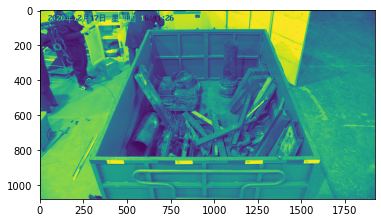

In [207]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('gray',gray_img)
length=img.shape[0]
depth=img.shape[1]

plt.imshow(gray_img)
plt.show()
# 高斯图片降噪
gs_img = cv2.GaussianBlur(gray_img, (3,3), 0, 0, cv2.BORDER_DEFAULT)

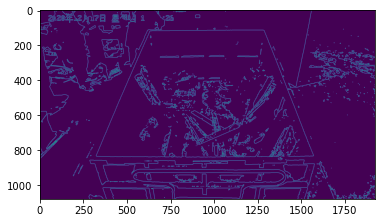

In [208]:
# Canny寻找轮廓
ret, thresh = cv2.threshold(gs_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
canny = cv2.Canny(thresh,100,150)
#cv2.imshow('canny',canny)
kernel=np.zeros((3,3),np.uint8)
canny = cv2.dilate(canny, kernel, iterations=1)
plt.imshow(canny)
plt.show()

In [209]:
def find_rectangle(contour):
    '''
    寻找矩形轮廓
    return：
        列表，包含四个值，x和y的最值坐标
    '''
    y,x = [],[]
    
    for p in contour:
        x.append(p[0][0])
        y.append(p[0][1])
    
    return [min(x),min(y),max(x),max(y)]

def locate_license(img):
    '''
    定位图中最大的矩形
    return：
        [[矩形坐标]，矩形框面积，长度比，矩，[轮廓面积,索引]]
    '''
    contours,hier = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    # 找出最大的区域
    maxarea = 0
    area = []
    block = []
    for index,c in enumerate(contours):
        # 找出轮廓的左上点和右下点，由此计算它的面积和长度比
        area = []
        r = find_rectangle(c)
        s = (r[2]-r[0])*(r[3]-r[1])   # 矩形框的面积
        l = (r[2]-r[0])*(r[3]-r[1])   # 长度比
        p = cv2.arcLength(c,False)  # 轮廓周长
        M = cv2.moments(c)          # 矩
        cs = cv2.contourArea(c)   # 轮廓面积
        if cs > maxarea:
            # 计算最大的轮廓面积
            maxarea = cs
            max_index = index
        area.append(cs)
        area.append(index)
        block.append([r,s,l,M,p,area,c])
    # max_index=block[]
    # 选出面积最大的区域
    block = sorted(block,key=lambda b: b[4])[-1:]
    return block


In [210]:
def shape(contours):
    epsilon = 0.01 * cv2.arcLength(contours, False)
    approx = cv2.approxPolyDP(contours, epsilon, True)
    corners = len(approx)
    shape_type = False
    if corners == 4:
        shape_type=True
    else:
        shape_type = False
    return shape_type

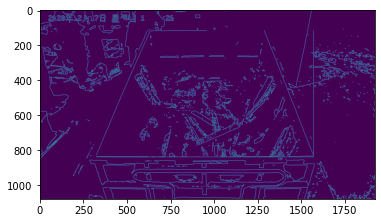

In [211]:
rect=locate_license(canny)
#cx = int(M['m10']/M['m00'])
#cy = int(M['m01']/M['m00'])
'''print("right_x:{}".format(rect[2]-cx))
print("left_x:{}".format(cx-rect[0]))'''
cv2.rectangle(canny,(rect[0][0][0],rect[0][0][1]),(rect[0][0][2],rect[0][0][3]),(255,255,250),2)
x,y,w,h = cv2.boundingRect(rect[0][6])
cv2.rectangle(canny,(x,y),(x+w,y+h),(0,255,0),2)
#cv2.imshow('rect',canny)
#cv2.circle(canny,(cx,cy),30,(255,255,250))
#cv2.circle(canny,(rect[0],rect[1]),30,(255,255,250))
plt.imshow(canny)
plt.show()

In [212]:
block

NameError: name 'block' is not defined

In [214]:
rect[0][2]/(depth*length)

0.4365943287037037

In [202]:
rect

[[[331, 124, 1563, 835],
  875952,
  875952,
  {'m00': 746.0,
   'm10': 766900.5,
   'm01': 607409.0,
   'm20': 860449641.8333333,
   'm11': 619245334.9166666,
   'm02': 499744862.0,
   'm30': 1041889782306.6001,
   'm21': 688209001733.6833,
   'm12': 507825437338.0333,
   'm03': 412857306595.7,
   'mu20': 72063077.62388289,
   'mu11': -5181294.8480786085,
   'mu02': 5179589.505361974,
   'mu30': 9169030202.85559,
   'mu21': -1734404803.937584,
   'mu12': 2516785467.419613,
   'mu03': -2480207407.3600464,
   'nu20': 129.48967796771862,
   'nu11': -9.310235191941667,
   'nu02': 9.307170872646921,
   'nu30': 603.2208365913707,
   'nu21': -114.10466468890957,
   'nu12': 165.57666422617342,
   'nu03': -163.1702321933561},
  6783.93640422821,
  [746.0, 2446],
  array([[[1287,  124]],
  
         [[1288,  125]],
  
         [[1288,  127]],
  
         ...,
  
         [[1289,  128]],
  
         [[1288,  127]],
  
         [[1288,  125]]], dtype=int32)]]

In [184]:
test = [[i for i in range(3)] for j in range(3)]

In [189]:
test[0:1,]

[[0, 1, 2]]

[[0, 1, 2], [0, 1, 2], [0, 1, 2]]

In [192]:
test[1]

[0, 1, 2]

In [2]:
import time
import datetime

In [7]:
data=datetime.datetime.now().strftime('%Y%m%d')
path = 'image'

In [9]:
os.path.join(path,data)

'image\\20210101'